In [1]:
import numpy as np
import pandas as pd
import joblib
import matplotlib.pyplot as plt
import os
from data.load_data import load_monk
from src.MetricFunctions import get_metric_instance
from src.MLP import MLP
from src.GridSearch import GridSearch, RandomGridsearch
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from src.EarlyStopping import EarlyStopping


Classification

In [2]:
from data.load_data import load_monk
path = os.getcwd()
file = '/data/monks-1.train'
file_test = '/data/monks-1.test'

labels = ['class','x1','x2','x3','x4','x5','x6']


X_train, y_train = load_monk(path+file)
X_test, y_test = load_monk(path+file_test)

print(X_train.shape)
print(y_train.shape)



(124, 6)
(124, 1)


In [3]:
# xtrain and test to dataframe
X_train = pd.DataFrame(X_train, columns=labels[1:])
X_test = pd.DataFrame(X_test, columns=labels[1:])
# one hot encoding of X_train and X_test
X_train = pd.get_dummies(X_train, columns=labels[1:])
X_test = pd.get_dummies(X_test, columns=labels[1:])
X_test = X_test.values
X_train = X_train.values

In [4]:
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(124, 17)
(124, 1)
(432, 17)
(432, 1)


Epoch 0: accuracy = 0.5080645161290323
Epoch 1: accuracy = 0.5403225806451613
Epoch 2: accuracy = 0.532258064516129
Epoch 3: accuracy = 0.5403225806451613
Epoch 4: accuracy = 0.5241935483870968
Epoch 5: accuracy = 0.532258064516129
Epoch 6: accuracy = 0.5161290322580645
Epoch 7: accuracy = 0.5161290322580645
Epoch 8: accuracy = 0.5403225806451613
Epoch 9: accuracy = 0.5483870967741935
Epoch 10: accuracy = 0.5403225806451613
Epoch 11: accuracy = 0.5403225806451613
Epoch 12: accuracy = 0.5403225806451613
Epoch 13: accuracy = 0.5403225806451613
Epoch 14: accuracy = 0.5967741935483871
Epoch 15: accuracy = 0.6209677419354839
Epoch 16: accuracy = 0.5967741935483871
Epoch 17: accuracy = 0.6209677419354839
Epoch 18: accuracy = 0.5967741935483871
Epoch 19: accuracy = 0.5967741935483871
Epoch 20: accuracy = 0.5564516129032258
Epoch 21: accuracy = 0.5564516129032258
Epoch 22: accuracy = 0.5806451612903226
Epoch 23: accuracy = 0.6290322580645161
Epoch 24: accuracy = 0.6451612903225806
Epoch 25: ac

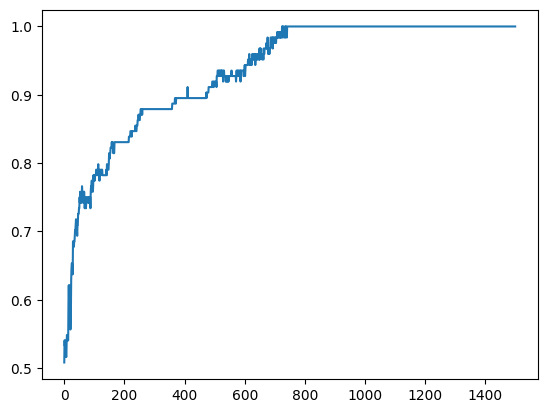

In [5]:
mlp = MLP([4], 17, 1, task = "classification", activation_function = "relu")

mlp.fit(X_train, y_train, n_epochs = 1500, batch_size = 50, error = "NLL", step = 0.2, regularization = 'no', momentum = 0,
        early_stopping = False, verbose = True)

y_pred = mlp.predict(X_test)

acc = get_metric_instance("accuracy")
print(acc(y_test, y_pred))
plt.plot(mlp.learning_curve)


Regression

In [1]:
import numpy as np
import pandas as pd
import joblib
import matplotlib.pyplot as plt
import os
from data.load_data import load_monk
from src.MetricFunctions import get_metric_instance
from src.MLP import MLP
from src.GridSearch import GridSearch, RandomGridsearch
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from src.EarlyStopping import EarlyStopping
path = os.getcwd()
file = '/data/ML-CUP22-TR.csv'

labels = ['x1','x2','x3','x4','x5','x6','x7','x8','x9','y1','y2']

TR = pd.read_csv(path + file, sep = ',', header = None, usecols=range(1,12), \
                 names = labels, skiprows = 7)

TR = TR.to_numpy()

np.random.shuffle(TR)

TR = np.split(TR, [9], axis = 1)

X = TR[0]
y_true = TR[1]

print(y_true)
print(X.shape)
print(y_true.shape)

n_epochs = 500

[[ 21.386696 -27.19712 ]
 [ 19.674086 -28.055541]
 [ 22.806681 -26.66441 ]
 ...
 [  4.718715 -20.327943]
 [  6.990824 -27.684359]
 [ 22.024534 -27.006012]]
(1492, 9)
(1492, 2)


In [4]:
err = []
for i in range(5):
  X_train, X_test, y_train, y_test = train_test_split(X, y_true, test_size=0.1)
  # sandardise X_train and X_test
  scaler = StandardScaler()
  scaler.fit(X_train)
  X_train = scaler.transform(X_train)
  X_test = scaler.transform(X_test)


  Parameters =  {'n_epochs': 15000, 'batch_size': 500, 'patience': 50, 'early_stopping': True,
  'Nesterov': False, 'weights_initialization': 'xavier', 'verbose': False, 'step': 0.001, 'momentum': 0.75,
    'regularization': 'no', 'tolerance': 0.0001, 'alpha_l2': 0.2, 'alpha_l1': 0.01}

  mlp = MLP([10,60], 9, 2, task = "regression", activation_function = "relu")

  mlp.fit(X_train, y_train, n_epochs= 5000, batch_size= 500, patience= 100, early_stopping= True,
  Nesterov= False, weights_initialization= 'xavier', verbose = False, step= 0.001, momentum= 0.75,
    regularization = 'no', tolerance= 0.0001, alpha_l2= 0.2, alpha_l1= 0.01)

  #mlp.fit(X_train, y_train, n_epochs = 500, batch_size = 500, error = "MSE", step = 0.1)

  y_pred = mlp.predict(X_test)

  mse = get_metric_instance("mse")
  err.append(mse(y_test, y_pred))
  plt.plot(mlp.learning_curve[0:500])
  print(mse(y_test, y_pred))
  plt.show()
  plt.close()
print(err)
print(np.mean(err))

KeyboardInterrupt: 

In [ ]:
fig, ax = plt.subplots(figsize=(5, 5), layout='constrained')

for step in [0.005, 0.01, 0.05, 0.1]:
    mlp.fit(X, y_true, n_epochs = n_epochs, batch_size = 50, step = step)
    ax.plot(range(n_epochs), mlp.learning_curve, label = 'step = ' + str(step), linewidth = 1)

ax.set_xlabel('epoch')  
ax.set_ylabel('training error (MSE)')  
ax.set_title("Learning curves with different values of the learning rate")  
ax.legend()


In [ ]:
fig, ax = plt.subplots(figsize=(5, 5), layout='constrained')
step = 0.1
for alpha_l2 in [0, 0.005, 0.01, 0.05, 0.1]:
    learning_curve = mlp.fit(X, y_true, n_epochs = n_epochs, batch_size = 50, step = step, regularization = "L2", alpha_l2 = alpha_l2)
    ax.plot(range(n_epochs), learning_curve, label = 'alpha L2 = ' + str(alpha_l2), linewidth = 1)

ax.set_xlabel('epoch')  
ax.set_ylabel('training error (MSE)')  
ax.set_title("Learning curves with different regularization")  
ax.legend()

In [ ]:
fig, ax = plt.subplots(figsize=(5, 5), layout='constrained')
step = 0.5
for momentum in [0, 0.1, 0.3]:
    learning_curve = mlp.fit(X, y_true, n_epochs = n_epochs, batch_size = 100, step = step, momentum = momentum)
    ax.plot(range(n_epochs), learning_curve, linewidth = 1, label = 'momentum = ' + str(momentum))

ax.set_xlabel('epoch')  
ax.set_ylabel('training error (MSE)')   
ax.set_title("Learning curves with different momentum")  
ax.legend()

In [ ]:
fig, ax = plt.subplots(figsize=(5, 5), layout='constrained')
step = 0.1
for batch_size in [1, 100]:
    learning_curve = mlp.fit(X, y_true, n_epochs = n_epochs, batch_size = batch_size, step = step)
    ax.plot(range(n_epochs), learning_curve, linewidth = 1, label = 'batch_size = ' + str(batch_size))

ax.set_xlabel('epoch')  
ax.set_ylabel('training error (MSE)')   
ax.set_title("Learning curves with different batch size")  
ax.legend()

In [ ]:
fig, ax = plt.subplots(figsize=(5, 5), layout='constrained')
step = 0.5

momentum = 0
learning_curve = mlp.fit(X, y_true, n_epochs = n_epochs, batch_size = 100, step = step)
ax.plot(range(n_epochs), learning_curve, linewidth = 1, label = 'momentum = ' + str(momentum))

momentum = 0.2
learning_curve = mlp.fit(X, y_true, n_epochs = n_epochs, batch_size = 100, step = step, momentum = momentum)
ax.plot(range(n_epochs), learning_curve, linewidth = 1, label = 'momentum = ' + str(momentum))

learning_curve = mlp.fit(X, y_true, n_epochs = n_epochs, batch_size = 100, step = step, momentum = momentum, Nesterov = True)
ax.plot(range(n_epochs), learning_curve, linewidth = 1, label = 'momentum = ' + str(momentum) + ' (Nesterov)')

ax.set_xlabel('epoch')  
ax.set_ylabel('training error (MSE)')    
ax.legend()

In [ ]:
n_classes = 5
input_size = 5
mlp = MLP([5, 5], input_size, n_classes, task = "classification")